In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob, os

In [12]:
# Take all .dat files and put in a list of files

os.chdir(".")
input_file_list = []
for cross_file in glob.glob("*.dat"):
    input_file_list.append(cross_file)
input_file_list

['ringer_jpsi_analysis.20180104_12874985.et2_eta2.dat',
 'ringer_jpsi_analysis.20180104_12874961.et1_eta1.dat',
 'ringer_jpsi_analysis.20180104_12874982.et2_eta1.dat',
 'ringer_jpsi_analysis.20180104_12874943.et0_eta0.dat',
 'ringer_jpsi_analysis.20180104_12874974.et1_eta4.dat',
 'ringer_jpsi_analysis.20180104_12874957.et1_eta0.dat',
 'ringer_jpsi_analysis.20180104_12874946.et0_eta1.dat',
 'ringer_jpsi_analysis.20180104_12874966.et1_eta2.dat',
 'ringer_jpsi_analysis.20180104_12874955.et0_eta4.dat',
 'ringer_jpsi_analysis.20180104_12874993.et2_eta4.dat',
 'ringer_jpsi_analysis.20180104_12874949.et0_eta2.dat',
 'ringer_jpsi_analysis.20180104_12874971.et1_eta3.dat',
 'ringer_jpsi_analysis.20180104_12874977.et2_eta0.dat',
 'ringer_jpsi_analysis.20180104_12874950.et0_eta3.dat',
 'ringer_jpsi_analysis.20180104_12874989.et2_eta3.dat']

In [35]:
input_file_list[0][input_file_list[0].find('et'):input_file_list[0].find('.dat')]
input_file_list[0][39:47]


'et2_eta2'

In [2]:
file_name = 'ringer_jpsi_analysis.20180104_12874943.et0_eta0.dat'
input_file = pickle.load(open(file_name,'rb'))

In [3]:
input_file.keys()

['eta_index', 'OperationPoint_Trigger_SP', 'et_index']

In [4]:
input_file['OperationPoint_Trigger_SP'][5]['mse']

[6.351250878066346e+24, 1.9053752634199038e+25]

In [5]:
min(input_file['OperationPoint_Trigger_SP'].keys()),max(input_file['OperationPoint_Trigger_SP'].keys())

(5, 20)

In [20]:
titles = {'fa': 'False Alarm', 'mse': 'Mean Squared Error', 'sp': 'SP index', 'det': 'Probability of Detection'}
titles

{'det': 'Probability of Detection',
 'fa': 'False Alarm',
 'mse': 'Mean Squared Error',
 'sp': 'SP index'}

In [34]:
type(input_file['OperationPoint_Trigger_SP'].keys())

list

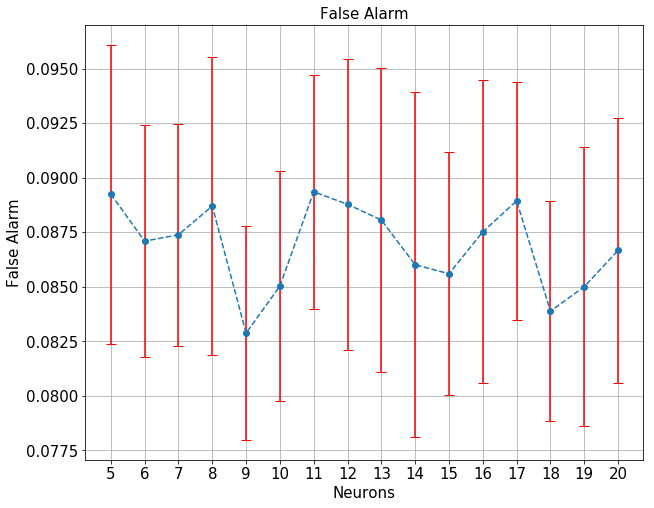

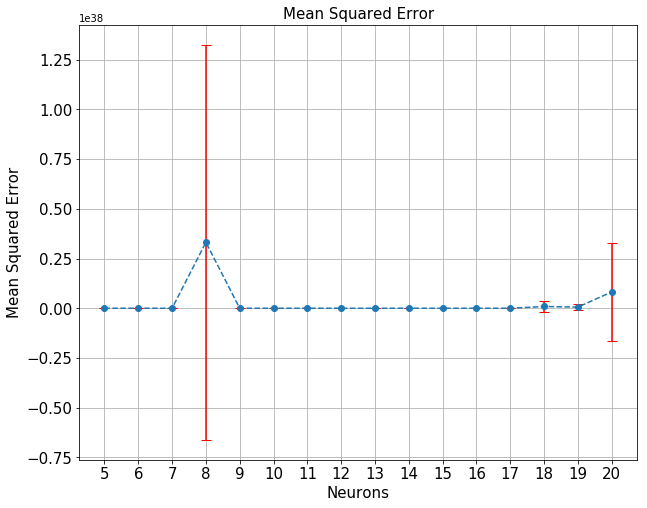

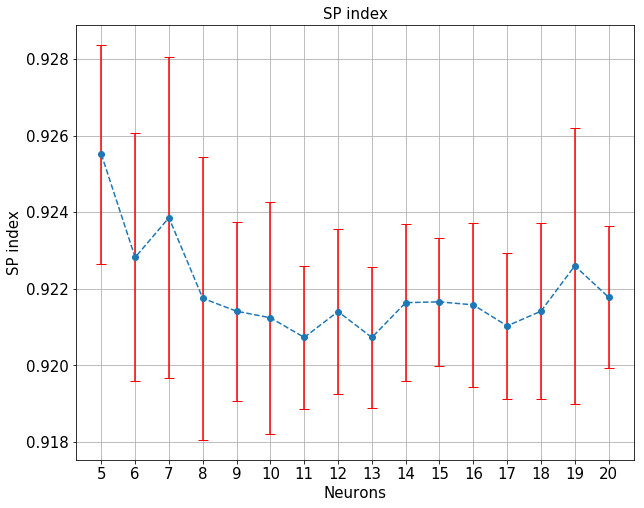

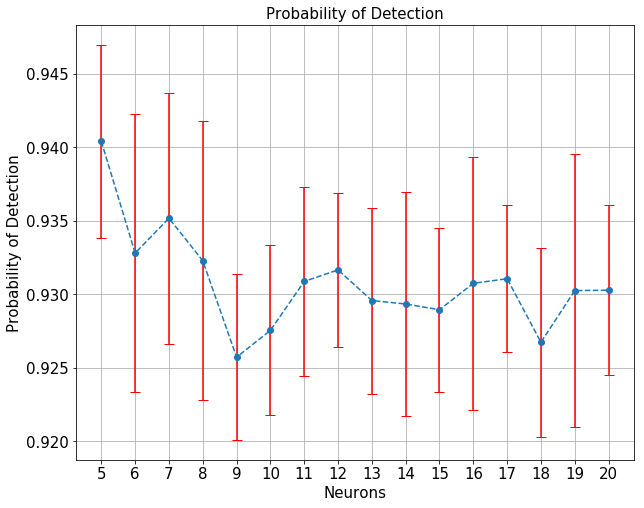

In [21]:
operations_points = ['OperationPoint_Trigger_SP']
refs = ['fa', 'mse', 'sp', 'det']
neurons = input_file['OperationPoint_Trigger_SP'].keys()

for operation in operations_points:
    for ref in refs:
        mean = []
        std = []
        for key in input_file[operation].keys():
            
            mean.append(input_file[operation][key][ref][0])
            std.append(input_file[operation][key][ref][1])
        
        plt.figure(figsize=(10,8))    
        plt.title(titles[ref], size= 15)
        plt.errorbar(neurons, mean, yerr= std, ecolor='r', fmt='o--', capsize=5)
        plt.xticks(np.arange(min(neurons), max(neurons)+1, 1.0), size= 15)
        plt.xlabel('Neurons', size= 15)
        plt.ylabel(titles[ref], size= 15)
        plt.yticks(size= 15)
        plt.grid()
        plt.show()
